<h1 style="color: red">PROJET-5</h1>
<img src="logo_bottleneck.png" alt='logo'/>


## Import des libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import des données

In [2]:
web = pd.read_excel('D:/ETUDES/IT/OC/DATA/PROJETS/PROJET-5/web.xlsx')
erp = pd.read_excel('D:/ETUDES/IT/OC/DATA/PROJETS/PROJET-5/erp.xlsx')
liaison = pd.read_excel('D:/ETUDES/IT/OC/DATA/PROJETS/PROJET-5/liaison.xlsx')

C:\Users\tomy\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# Travail préliminaire sur les données

### Travail sur web

On regarde la taille des données : nombre de lignes et nombre de colonnes

In [3]:
web.shape

(1513, 28)

On regarde l'ensemble des colonnes et leurs types

In [4]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [5]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


# Nettoyage des données

chercher les na dans le dataframe web

On s'interresse maintenant aux valeurs null de web en pourcentage par colonne

In [6]:
web.isna().mean()*100

sku                        5.617978
virtual                    0.000000
downloadable               0.000000
rating_count               0.000000
average_rating             5.485790
total_sales                5.485790
tax_status                52.676801
tax_class                100.000000
post_author                5.485790
post_date                  5.485790
post_date_gmt              5.485790
post_content             100.000000
post_title                 5.485790
post_excerpt              52.676801
post_status                5.485790
comment_status             5.485790
ping_status                5.485790
post_password            100.000000
post_name                  5.485790
post_modified              5.485790
post_modified_gmt          5.485790
post_content_filtered    100.000000
post_parent                5.485790
guid                       5.485790
menu_order                 5.485790
post_type                  5.485790
post_mime_type            52.808989
comment_count              5

On s'interresse aux séries de web pour isoler les null/na

In [7]:
web['sku'].isna().sum()

85

85 lignes sku sont na On isole dans isnaWeb les na pour mieux les voir

In [8]:
isnaWeb = web[web['sku'].isna()]
isnaWeb

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
isnaWeb.isna().mean()*100

sku                      100.000000
virtual                    0.000000
downloadable               0.000000
rating_count               0.000000
average_rating            97.647059
total_sales               97.647059
tax_status                97.647059
tax_class                100.000000
post_author               97.647059
post_date                 97.647059
post_date_gmt             97.647059
post_content             100.000000
post_title                97.647059
post_excerpt              97.647059
post_status               97.647059
comment_status            97.647059
ping_status               97.647059
post_password            100.000000
post_name                 97.647059
post_modified             97.647059
post_modified_gmt         97.647059
post_content_filtered    100.000000
post_parent               97.647059
guid                      97.647059
menu_order                97.647059
post_type                 97.647059
post_mime_type           100.000000
comment_count             97

On regarde les 40 premières valeurs pour isoler certains cas

In [10]:
isnaWeb.head(40)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On remarque qu'il y a des valeurs par les na dans certaines colonnes et on les isole pour les évaluer
la suppression des 85 lignes na entraine la suppression de ces 2 lignes

In [11]:
isnaWeb[~isnaWeb['total_sales'].isna()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


On supprime les 85 lignes de web qui on des sku na

In [12]:
web = web[~web['sku'].isna()]

In [13]:
web.isna().mean()*100

sku                        0.0
virtual                    0.0
downloadable               0.0
rating_count               0.0
average_rating             0.0
total_sales                0.0
tax_status                50.0
tax_class                100.0
post_author                0.0
post_date                  0.0
post_date_gmt              0.0
post_content             100.0
post_title                 0.0
post_excerpt              50.0
post_status                0.0
comment_status             0.0
ping_status                0.0
post_password            100.0
post_name                  0.0
post_modified              0.0
post_modified_gmt          0.0
post_content_filtered    100.0
post_parent                0.0
guid                       0.0
menu_order                 0.0
post_type                  0.0
post_mime_type            50.0
comment_count              0.0
dtype: float64

On regarde une colonne à 50% de valeurs na : tax_status

In [14]:
web.loc[web['tax_status'].isna(), : ]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Lister puis Supprimer les colonnes avec 100% de na

In [15]:
columnWithNan = web.columns[web.isna().any()]
for column in columnWithNan:
    print(column,web[column].isna().mean()*100)

tax_status 50.0
tax_class 100.0
post_content 100.0
post_excerpt 50.0
post_password 100.0
post_content_filtered 100.0
post_mime_type 50.0


In [16]:
var_supp = ['tax_class', 'post_content','post_password','post_content_filtered']
for var in var_supp:
    web = web.drop(columns=[var])

In [17]:
web.shape

(1428, 24)

In [18]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                1428 non-null   object        
 1   virtual            1428 non-null   int64         
 2   downloadable       1428 non-null   int64         
 3   rating_count       1428 non-null   int64         
 4   average_rating     1428 non-null   float64       
 5   total_sales        1428 non-null   float64       
 6   tax_status         714 non-null    object        
 7   post_author        1428 non-null   float64       
 8   post_date          1428 non-null   datetime64[ns]
 9   post_date_gmt      1428 non-null   datetime64[ns]
 10  post_title         1428 non-null   object        
 11  post_excerpt       714 non-null    object        
 12  post_status        1428 non-null   object        
 13  comment_status     1428 non-null   object        
 14  ping_sta

Les valeurs manquant pour voir si remplacement

In [19]:
web['tax_status'].unique()

array(['taxable', nan], dtype=object)

<div class="alert alert-block alert-info">tax_status : Il n'y a que 2 valeurs : taxable et nan</div> 

In [20]:
web['post_excerpt'].unique()

array(['<span style="color: #a85253;"><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !',
       'Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.',
       'Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !',
       'Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.',
       'Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.',
       'Le côte rôtie Carmina monte en puissance mais garde un milieu de bouche pulpeux aux tanins aboutis. En référence à Carmina Burana, ce Côte Rôtie associe puissance, pureté, complexité et sensualité.',
       "R

In [21]:
web.loc[web['post_excerpt'].isnull(),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


<div class="alert alert-block alert-info">post_excerpt : ce sont les descriptifs des vins</div>

In [22]:
web['post_mime_type'].unique()

array([nan, 'image/jpeg'], dtype=object)

<div class="alert alert-block alert-success"> post_mime_type : 2 valeurs nan et image/jpeg</div>

## L'unicité des clés : web

In [23]:
web.duplicated('sku').sum()

714

In [24]:
web[web.duplicated('sku')]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [25]:
web.duplicated('sku').value_counts()

False    714
True     714
dtype: int64

Affichage du premier doublon pour voir les colonne différentes utiles

In [26]:
web[web['sku']==15298]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [27]:
web['post_type'].unique()

array(['product', 'attachment'], dtype=object)

On sauvegarde les donnée dans webPlus
Pour éliminer les doublons on prend :
- la colonne post_mime_type et on supprime les nan



In [28]:
webPlus = web.loc[~web['post_mime_type'].isnull(),:]

In [29]:
web = web.loc[web['post_mime_type'].isnull(),:]

In [30]:
web['sku'].shape

(714,)

In [31]:
web.duplicated('sku').sum()

0

<div class="alert alert-block alert-success">Les sku qui nous serviront d'id ne sont plus dupliqués</div>

<div class="alert alert-block alert-info"> On perd les informations : tax_status et post_excerpt
    sauvegarde dans webPlus
</div>

In [32]:
columnWithNan = web.columns[web.isna().any()]
for column in columnWithNan:
    print(column,web[column].isna().mean()*100)

post_mime_type 100.0


In [33]:
web = web.drop(columns=['post_mime_type'])

In [34]:
web.isnull().mean()*100

sku                  0.0
virtual              0.0
downloadable         0.0
rating_count         0.0
average_rating       0.0
total_sales          0.0
tax_status           0.0
post_author          0.0
post_date            0.0
post_date_gmt        0.0
post_title           0.0
post_excerpt         0.0
post_status          0.0
comment_status       0.0
ping_status          0.0
post_name            0.0
post_modified        0.0
post_modified_gmt    0.0
post_parent          0.0
guid                 0.0
menu_order           0.0
post_type            0.0
comment_count        0.0
dtype: float64

In [35]:
web.duplicated().value_counts()

False    714
dtype: int64

### Travail sur liaison

Renommer la colonne id-web par sku

In [36]:
liaison.rename(columns={'id_web' : 'sku'},inplace=True)
liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [37]:
liaison['product_id'].unique().shape

(825,)

In [38]:
liaison.dtypes

product_id     int64
sku           object
dtype: object

In [39]:
#changer le type de productct_id car c'est une variable qualitative en tant qu'ID
liaison['product_id'] = liaison['product_id'].astype('object')

In [40]:
liaison.dtypes

product_id    object
sku           object
dtype: object

In [41]:
liaison['product_id'].shape

(825,)

In [42]:
liaison['product_id'].duplicated().value_counts()

False    825
Name: product_id, dtype: int64

In [43]:
liaison['sku'].shape

(825,)

In [44]:
liaison['sku'].duplicated().value_counts()

False    735
True      90
Name: sku, dtype: int64

In [45]:
liaison.loc[liaison['sku'].isna(),:]

,product_id,sku
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [46]:
df = liaison.loc[liaison['sku'].duplicated(),:]

In [47]:
df['sku'].unique()

array([nan], dtype=object)

In [48]:
df['sku'].shape

(90,)

<div class="alert alert-block alert-danger">Il y a 90 'sku' en doublon qui sont des NAN, les product_id sont différents donc on ne les suprime pas</div>

# Mainternant on regarde erp

In [49]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

On change le type de product id en object car c'est un identifiant et donc une category

In [50]:
erp['product_id'] = erp['product_id'].astype('object')

In [51]:
erp.dtypes

product_id         object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [52]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [53]:
erp['product_id'].duplicated().sum()

0

<div class="alert alert-block alert-success">
    Pas de doublon dans la colonne product_id
</div>

In [54]:
erp.shape

(825, 5)

In [55]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    object 
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 32.4+ KB


In [56]:
erp.describe(include='all')

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.0,825.000000,825.000000,825.000000,825
unique,825.0,NaN,NaN,NaN,2
top,3847.0,NaN,NaN,NaN,instock
freq,1.0,NaN,NaN,NaN,638
mean,NaN,0.869091,32.415636,26.496970,NaN
std,NaN,0.337506,26.795849,45.892422,NaN
min,NaN,0.000000,5.200000,0.000000,NaN
25%,NaN,1.000000,14.600000,1.000000,NaN
50%,NaN,1.000000,24.400000,11.000000,NaN
75%,NaN,1.000000,42.000000,34.000000,NaN


# JOINTURES

erp et web par liaison
outer join on garde tout
inner on garde que les communs


In [57]:
liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [58]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [59]:
df_temp = pd.merge(liaison,erp, on='product_id',how='outer')
df_temp.shape

(825, 6)

In [60]:
df_temp.isna().sum()

product_id         0
sku               91
onsale_web         0
price              0
stock_quantity     0
stock_status       0
dtype: int64

## Joindre df_final et web

In [61]:
web.shape

(714, 23)

df_temp.shape

Jointure left pour garder toutes les données du df web car il contient les prix et les ventes

In [62]:
df_final = pd.merge(df_temp, web, on='sku',how='left')
df_final.shape

(825, 28)

In [63]:
df_final.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,3850,15300,1,20.8,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,4032,19814,1,14.1,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,4039,19815,1,46.0,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


# Calculs 

In [64]:
df_final.dtypes

product_id                   object
sku                          object
onsale_web                    int64
price                       float64
stock_quantity                int64
stock_status                 object
virtual                     float64
downloadable                float64
rating_count                float64
average_rating              float64
total_sales                 float64
tax_status                   object
post_author                 float64
post_date            datetime64[ns]
post_date_gmt        datetime64[ns]
post_title                   object
post_excerpt                 object
post_status                  object
comment_status               object
ping_status                  object
post_name                    object
post_modified        datetime64[ns]
post_modified_gmt    datetime64[ns]
post_parent                 float64
guid                         object
menu_order                  float64
post_type                    object
comment_count               

In [65]:
df_final.loc[:,['sku','price','total_sales']]

,sku,price,total_sales
0,15298,24.2,6.0
1,15296,34.3,0.0
2,15300,20.8,0.0
3,19814,14.1,3.0
4,19815,46.0,0.0
...,...,...,...
820,NaN,45.0,NaN
821,NaN,45.0,NaN
822,13127-1,54.8,0.0
823,14680-1,26.5,NaN


In [66]:
df_final.iloc[0,:]

product_id                                                        3847
sku                                                              15298
onsale_web                                                           1
price                                                             24.2
stock_quantity                                                       0
stock_status                                                outofstock
virtual                                                            0.0
downloadable                                                       0.0
rating_count                                                       0.0
average_rating                                                     0.0
total_sales                                                        6.0
tax_status                                                     taxable
post_author                                                        2.0
post_date                                          2018-02-08 12:58:52
post_d

In [67]:
df_final['total_sales']*df_final['price']

0      145.2
1        0.0
2        0.0
3       42.3
4        0.0
       ...  
820      NaN
821      NaN
822      0.0
823      NaN
824      0.0
Length: 825, dtype: float64

Création d'un data frame achat 

In [68]:
achats = df_final.loc[df_final['total_sales'].notnull(),:].copy()
achats.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,3850,15300,1,20.8,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,4032,19814,1,14.1,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,4039,19815,1,46.0,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [69]:
achats.shape

(714, 28)

Sur les 825 références presentent dans le df 'ERP' 714 ont donnée lieu a des ventes listées dans 'web' que l'on isolent dans le df 'achats'

# Chiffre d'affaire par produits

In [70]:
achats.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,3850,15300,1,20.8,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,4032,19814,1,14.1,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,4039,19815,1,46.0,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


<div class="alert alert-block alert-success">Création de la colonne ca_par_produit pour caluculer le chiffre d'affaire par produit</div>

# Lister des CA par produit 

In [71]:
achats['ca_par_produit'] = achats['price']*achats['total_sales']
achats.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca_par_produit
0,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,145.2
1,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
2,3850,15300,1,20.8,0,outofstock,0.0,0.0,0.0,0.0,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
3,4032,19814,1,14.1,0,outofstock,0.0,0.0,0.0,0.0,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,42.3
4,4039,19815,1,46.0,0,outofstock,0.0,0.0,0.0,0.0,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0


In [72]:
achats.loc[:,['product_id','price','total_sales','ca_par_produit']].sort_values("ca_par_produit")

,product_id,price,total_sales,ca_par_produit
824,7338,16.3,0.0,0.0
365,4759,16.9,0.0,0.0
364,4758,24.3,0.0,0.0
668,5962,30.0,0.0,0.0
362,4755,7.4,0.0,0.0
...,...,...,...,...
72,4141,39.0,40.0,1560.0
73,4142,53.0,30.0,1590.0
227,4402,176.0,13.0,2288.0
74,4144,49.0,87.0,4263.0


Le chiffre d'affaire par produit trier permet de voir ce que rapporte les produits dans l'ensemble
- le prix unitaire et la quantité permettent de voir que l'article qui rapporte le plus est le product_id 4334 ayant un prix de 49 euros mais vendu 96 fois
- Le product_id 4402 a un prix plus important et son volume de vente est inférieur aux 5 plus grandes valeurs et son ca reste significatif danc le ca total

Le produit qui rapporte le plus au CA est le product_id 4334

In [73]:

achats.loc[:,['product_id','price','total_sales','ca_par_produit']].sort_values("ca_par_produit")

,product_id,price,total_sales,ca_par_produit
824,7338,16.3,0.0,0.0
365,4759,16.9,0.0,0.0
364,4758,24.3,0.0,0.0
668,5962,30.0,0.0,0.0
362,4755,7.4,0.0,0.0
...,...,...,...,...
72,4141,39.0,40.0,1560.0
73,4142,53.0,30.0,1590.0
227,4402,176.0,13.0,2288.0
74,4144,49.0,87.0,4263.0


In [74]:
achats[achats['product_id']==4334]

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca_par_produit
203,4334,7818,1,49.0,0,outofstock,0.0,0.0,0.0,0.0,...,closed,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4704.0


In [75]:
achats[achats['product_id']==4334]

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca_par_produit
203,4334,7818,1,49.0,0,outofstock,0.0,0.0,0.0,0.0,...,closed,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4704.0


Les 2 produits qui rapportent le plus au ca sont aussi ceux qui sont le plus vendus 
- product id : 
    - 4334
    - 4144

# Analyse

La moyenne des ventes

In [76]:
achats['price'].mean()

32.49313725490197

La bouteille la plus chère vendue

In [77]:
achats['price'].max()

225.0

Le nombre de bouteilles acheté en moyenne

In [79]:
achats['total_sales'].mean()

4.012605042016807

Le nombre maximum de bouteille vendues

In [81]:
achats['total_sales'].max()

96.0

- la moyenne des prix est de 32,49 euros
- la prix maximum affiché est de 225 euros
- le nombre moyen de bouteille vendue est de 4 bouteilles
- le nombre maximum vendu est de 96 bouteilles
- En raison des données fournies (df client-commande) il n'est pas possible de calculer le panier moyen mais il sera utile de le faire par la suite 

<div class="alert alert-block alert-success">Calcul du chiffre d'affaire total</div>

# Le chiffre d'affaire de l'entreprise est de 70568,6 euros

In [82]:
CA = achats['ca_par_produit'].sum()
print("Le chiffre d'affaire de l'entreprise est", CA, "euros")

Le chiffre d'affaire de l'entreprise est 70568.6 euros


#### Début de vérification par un methode différente

Vérification des chiffres d'affaire 
- groupby
    - avec sku
    - avec poduct_id

<div class="alert alert-block alert-info">Vérification ca_par_produit</div>

In [83]:
achats.groupby('sku').sum()[['ca_par_produit']]

,ca_par_produit
sku,
38,326.8
41,0.0
304,1560.0
523,0.0
531,292.5
...,...
19820,0.0
19821,0.0
19822,0.0


In [84]:
achats.groupby('product_id').sum()[['ca_par_produit']]

,ca_par_produit
product_id,
3847,145.2
3849,0.0
3850,0.0
4032,42.3
4039,0.0
...,...
6930,42.0
7023,0.0
7025,0.0


<div class="alert alert-block alert-info">Vérification du résultat CA par la méthode groupby</div>

In [85]:
CA_total = achats.groupby('product_id').sum()[['ca_par_produit']].sum()
print(CA_total)

ca_par_produit    70568.6
dtype: float64


# Erreur de saisie dans certains prix produits
Troisièmement et pour finir, je me demande s’il n’y a pas eu des erreurs de saisie dans certains prix des produits.
- J'aimerais que tu effectues une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, 
- de les lister 
- d’en faire une représentation graphique pour plus de lisibilité.

## Méthode 1 : moyenne, Tmin, Tmax, ecart type, α = 3

### Analyse

dataAberrantes['price'].value_counts().sort_values() le facteur de seuil pour définir le nombre de SD. Généralement, le point de données qui est à 3 (α = 3) SD de la moyenne est considéré comme une valeur aberrante.

Cette méthode fonctionne bien si les données sont distribuées normalement et lorsqu'il y a très peu de pourcentages de valeurs aberrantes dans l'ensemble de données. Il est également sensible aux valeurs aberrantes car la moyenne et l'écart-type changeront si la valeur aberrante est présente.

In [86]:
# moyenne
mean = achats['price'].mean()
mean

32.49313725490197

In [87]:
#déviation standard
std = achats['price'].std()
std

27.810524922323726

In [88]:
#le Tmin
Tmin = mean-(3*std)
Tmin

-50.938437512069214

In [89]:
# le Tmax
Tmax = mean+(3*std)
Tmax

115.92471202187315

In [90]:
#trouver les outlier
dataAberrantes = achats.loc[(achats["price"] < Tmin) | (achats["price"] > Tmax)]

In [91]:
dataAberrantes.value_counts().sum()

14

La méthode de la moyenne et de l'écart type a identifié 14 valeurs aberrantes


### Liste des données aberrantes

On liste et compte ne nombre d'occurences des données aberrantes

In [92]:
dataAberrantes['price'].value_counts().sort_values()

225.0    1
126.5    1
176.0    1
157.0    1
137.0    1
217.5    1
124.8    1
175.0    1
191.3    1
122.0    1
135.0    1
116.4    1
121.0    2
Name: price, dtype: int64

On remarque que le prix le plus bas est 116.4 qui sera utilisé pour tracer une droiter sur le graphique afin de mieux visualiser les données aberrantes des autres données

In [93]:
dataAberrantes

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca_par_produit
208,4352,15940,1,225.0,0,outofstock,0.0,0.0,0.0,0.0,...,closed,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,1125.0
210,4355,12589,1,126.5,2,instock,0.0,0.0,0.0,0.0,...,closed,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,1391.5
227,4402,3510,1,176.0,8,instock,0.0,0.0,0.0,0.0,...,closed,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,2288.0
230,4406,7819,1,157.0,3,instock,0.0,0.0,0.0,0.0,...,closed,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
411,4904,14220,1,137.0,13,instock,0.0,0.0,0.0,0.0,...,closed,domaine-des-croix-corton-charlemagne-grand-cru...,2020-05-19 17:15:02,2020-05-19 15:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,685.0
460,5001,14581,1,217.5,20,instock,0.0,0.0,0.0,0.0,...,closed,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,2020-05-16 07:00:05,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
556,5612,14915,1,124.8,12,instock,0.0,0.0,0.0,0.0,...,closed,domaine-weinbach-gewurztraminer-gc-furstentum-...,2019-01-23 09:33:57,2019-01-23 08:33:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
598,5767,15185,1,175.0,12,instock,0.0,0.0,0.0,0.0,...,closed,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,2020-06-11 13:25:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
635,5892,14983,1,191.3,10,instock,0.0,0.0,0.0,0.0,...,closed,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,2020-04-01 07:30:09,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,573.9
651,5917,14775,1,122.0,4,instock,0.0,0.0,0.0,0.0,...,closed,wemyss-malts-single-cask-scotch-whisky-choc-n-...,2020-03-11 09:30:09,2020-03-11 08:30:09,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0


### Representation graphique

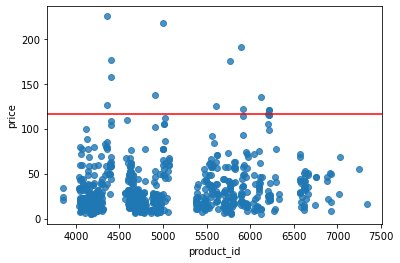

In [94]:
sns.regplot(x=achats["product_id"], y=achats["price"], fit_reg=False)
plt.axhline(y=116.4,color='red')
plt.show()

méthode non satisfaisante : ne prend pas assez de valeurs aberrante en compte

## Méthode 2 : Médiane et écart absolu médian (MAD)

Médiane et écart absolu médian (MAD)
La médiane de l'ensemble de données peut être utilisée pour trouver la valeur aberrante. La médiane est plus robuste aux valeurs aberrantes que la moyenne.

Contrairement à la moyenne, où l'écart type est utilisé pour la détection des valeurs aberrantes, la médiane est utilisée dans la méthode de l'écart absolu médian (MAD) pour la détection des valeurs aberrantes.

MAD est calculé comme
Formule de l'écart absolu médian (MAD)
MAD = b * median(|xi-median(x)|)

Où b est le facteur d'échelle et sa valeur définie sur 1,4826 lorsque les données sont distribuées normalement.

Maintenant, la valeur MAD est utilisée pour calculer les valeurs seuils pour la détection des valeurs aberrantes,
Formule médiane et écart absolu médian (MAD)
Tmin,Tmax = median(x)+-(α*MAD)

Où, T min et T max sont les seuils minimum et maximum pour trouver la valeur aberrante, et α est un facteur pour définir le nombre de MAD. Généralement, le point de données qui est à 3 (α = 3) MAD de la médiane est considéré comme une valeur aberrante.

Cette méthode est plus efficace que la méthode SD pour la détection des valeurs aberrantes, mais cette méthode est également sensible si l'ensemble de données contient plus de 50 % de valeurs aberrantes ou si 50 % des données contiennent les mêmes valeurs.

### Analyse

In [95]:
#get median
med = achats['price'].median()
med

23.55

In [96]:
#soustraire la médiane de chaque valeur de x et obtenir l'écart absolu
achats['price_med'] = achats['price']-med
achats['price_med_abs'] = achats['price_med'].abs()
achats.drop(columns=["price_med"], inplace=True)
achats.head(2)

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca_par_produit,price_med_abs
0,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,145.2,0.65
1,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0,10.75


In [97]:
#get MAD
mad = 1.4826*achats['price_med_abs'].median()
mad

16.679249999999996

In [98]:
# obtenir des valeurs de seuil pour les valeurs aberrantes
# Tmin
Tmin = med-(3*mad)
Tmin

-26.487749999999988

In [99]:
# obtenir des valeurs de seuil pour les valeurs aberrantes
# Tmax
Tmax = med+(3*mad)
Tmax

73.58774999999999

In [100]:
#trouver les outlier
dataAberrantes = achats.loc[(achats["price"] < Tmin) | (achats["price"] > Tmax)]
dataAberrantes['price'].mean()

108.57346938775511

In [101]:
dataAberrantes.shape

(49, 30)

La méthode de la médiane et de l'écart absolu (MAD) a identifiée 49 valeurs aberrantes

### Lister les données

In [102]:
dataAberrantes[['product_id','price','total_sales','ca_par_produit']]

,product_id,price,total_sales,ca_par_produit
10,4046,80.0,6.0,480.0
36,4073,77.8,0.0,0.0
66,4115,100.0,0.0,0.0
68,4132,88.4,0.0,0.0
71,4139,77.4,0.0,0.0
132,4210,79.8,0.0,0.0
205,4337,83.0,0.0,0.0
207,4350,79.5,0.0,0.0
208,4352,225.0,5.0,1125.0
209,4353,79.5,3.0,238.5


### Représentation graphique

On identifie le minimum pour tracer la droite qui separera les outliers des des autres données par une methode .min()

In [103]:
dataAberrantes[['price']].min()

price    74.5
dtype: float64

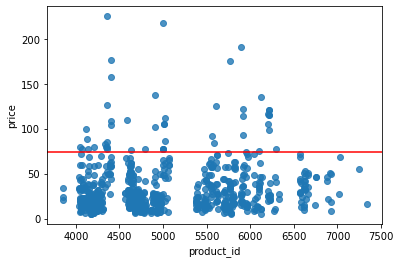

In [104]:
sns.regplot(x=achats["product_id"], y=achats["price"], fit_reg=False)
plt.axhline(y=74.5,color='red')
plt.show()

Méthode non satisfaisante : trop de valeurs aberrantes

## Méthode 3 : Méthode interquartile (IQR)

<div class="alert alert-block alert-success">La méthode interquartile a identifié 32 valeurs aberrantes, cette valeur est en adéquation avec le diagramme à moustache et parait être la mieux adaptée</div>

### Analyse

In [105]:
achats.describe()

,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_parent,menu_order,comment_count,ca_par_produit,price_med_abs
count,714.0,714.000000,714.000000,714.0,714.0,714.0,714.0,714.000000,714.000000,714.0,714.0,714.0,714.000000,714.000000
mean,1.0,32.493137,28.746499,0.0,0.0,0.0,0.0,4.012605,1.998599,0.0,0.0,0.0,98.835574,18.026471
std,0.0,27.810525,48.012608,0.0,0.0,0.0,0.0,8.518183,0.037424,0.0,0.0,0.0,307.685071,22.980596
min,1.0,5.200000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.050000
25%,1.0,14.100000,2.000000,0.0,0.0,0.0,0.0,0.000000,2.000000,0.0,0.0,0.0,0.000000,5.850000
50%,1.0,23.550000,12.000000,0.0,0.0,0.0,0.0,1.000000,2.000000,0.0,0.0,0.0,15.250000,11.250000
75%,1.0,42.175000,35.000000,0.0,0.0,0.0,0.0,4.000000,2.000000,0.0,0.0,0.0,91.150000,18.625000
max,1.0,225.000000,578.000000,0.0,0.0,0.0,0.0,96.000000,2.000000,0.0,0.0,0.0,4704.000000,201.450000


In [106]:
from scipy.stats import iqr

In [107]:
#Calcul de l'IRQ
irq = iqr(achats['price'])
irq

28.075000000000003

In [108]:
#Tmin
Tmin=14.1-(1.5*irq)
Tmin

-28.012500000000003

In [109]:
#Tmax
Tmax = 42.175+(1.5*irq)
Tmax

84.2875

In [110]:
# les outlier
dataAberrantes = achats.loc[(achats["price"] < Tmin) | (achats["price"] > Tmax)]
dataAberrantes['price'].mean()

124.571875

In [111]:
dataAberrantes.shape

(32, 30)

### Lister les données

In [112]:
dataAberrantes[['product_id','price','total_sales','ca_par_produit']].sort_values('price')

,product_id,price,total_sales,ca_par_produit
214,4359,85.6,1.0,85.6
476,5026,86.8,0.0,0.0
68,4132,88.4,0.0,0.0
545,5565,92.0,0.0,0.0
650,5916,93.0,0.0,0.0
710,6214,99.0,0.0,0.0
66,4115,100.0,0.0,0.0
410,4903,102.3,0.0,0.0
231,4407,104.0,1.0,104.0
466,5008,105.0,0.0,0.0


Les données sont triées par prix pour definir le minimum afin de tracer la droite sur le graphique : 85.6

### Représentation graphique

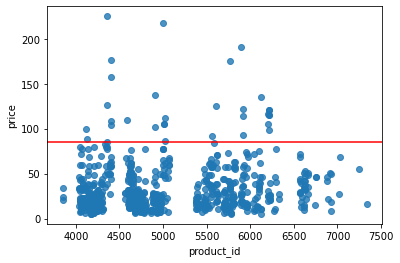

In [113]:
sns.regplot(x=achats["product_id"], y=achats["price"], fit_reg=False)
plt.axhline(y=85.6,color='red')
plt.show()

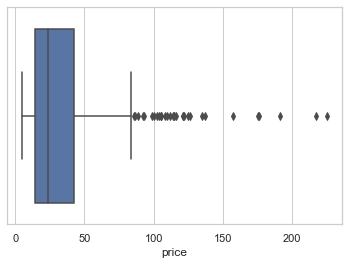

In [114]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=achats["price"])

Conclusion : 
Les ouliers sont des bouteilles qui disposent d'un prix plus élevés; 
Ce sont des champagnes, des cognacs et des vins qui sont plus onéreuses que la plupart des bouteilles vendues par l'enseigne.

# La moitié des ventes est faite par des bouteilles entre 5 et 23 euros

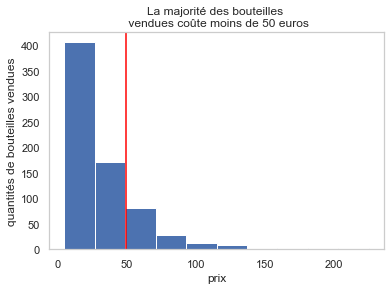

In [126]:
achats['price'].hist(density=False)
plt.xlabel('prix')
plt.ylabel('quantités de bouteilles vendues')
plt.title('La majorité des bouteilles \n vendues coûte moins de 50 euros')
plt.axvline(x=50,color='red')
plt.grid(False)
plt.show()
#fréquence des prix de vente CA

In [121]:
achats['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64